In [75]:
# Importing dependencies
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

In [53]:
# Loading the csv-files and checking shape
data = pd.read_csv(os.path.join('data','preprocessed_data_medium.csv'), index_col=0)
print(data.shape)
data

(569375, 5)


/tmp/ipykernel_153/2835612912.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join('data','preprocessed_data_medium.csv'), index_col=0)


,document,sub_reddit,date,type,language
0,"Ya pomniu etogo ""diktatora"" I ivo rech....day ...",ukraina,2022-03-23,submission,hr
1,"""Why Russians should take collective responsib...",ukraina,2022-03-23,submission,en
2,Reach out to russians and inform them about wa...,ukraina,2022-03-23,submission,en
3,"March 23, 2022: UA Air Force destroyed 7 Russi...",ukraina,2022-03-23,submission,en
4,Zelenskyy addresses in English: “I ask you to ...,ukraina,2022-03-23,submission,en
...,...,...,...,...,...
450184,It's on the home page articles today,geopolitics,2022-03-07,comment,en
450185,It really is wild to see him so badly miscalcu...,geopolitics,2022-03-07,comment,en
450186,panic fear and being cut off from swift \nrus...,geopolitics,2022-03-07,comment,en
450187,Post a [submission statement](https://www.redd...,geopolitics,2022-03-07,comment,en


In [8]:

# Loading the csv-files and checking shape
data_pkl = pd.read_pickle(os.path.join('data','preprocessed_data_medium.pkl'))
print(data_pkl.shape)
data_pkl

(422567, 5)


,document,sub_reddit,date,type,language
0,"Ya pomniu etogo ""diktatora"" I ivo rech....day ...",ukraina,2022-03-23,submission,hr
1,"""Why Russians should take collective responsib...",ukraina,2022-03-23,submission,en
2,Reach out to russians and inform them about wa...,ukraina,2022-03-23,submission,en
3,"March 23, 2022: UA Air Force destroyed 7 Russi...",ukraina,2022-03-23,submission,en
4,Zelenskyy addresses in English: “I ask you to ...,ukraina,2022-03-23,submission,en
...,...,...,...,...,...
450184,It's on the home page articles today,geopolitics,2022-03-07,comment,en
450185,It really is wild to see him so badly miscalcu...,geopolitics,2022-03-07,comment,en
450186,panic fear and being cut off from swift \nrus...,geopolitics,2022-03-07,comment,en
450187,Post a [submission statement](https://www.redd...,geopolitics,2022-03-07,comment,en


### Summary statistics

In [209]:
from statistics import mean
import numpy as np
outpath = os.path.join("plots")

In [222]:
# summary stats for document length
#temp = data[data['document'].apply(lambda x: isinstance(x, str))]
#temp["doc_length"] = temp["document"].apply(len)
x = temp["doc_length"][temp["doc_length"].between(temp["doc_length"].quantile(0), temp["doc_length"].quantile(.999))]
x.describe()
#temp["doc_length"].describe()

count    568798.000000
mean        129.707132
std         190.253805
min           1.000000
25%          38.000000
50%          57.000000
75%         145.000000
max        2515.000000
Name: doc_length, dtype: float64

In [223]:
test = temp[temp.doc_length == 2515]
test

,document,sub_reddit,date,type,language,doc_length
15765,"Dunno, I just read a report that most multinat...",geopolitics,2022-03-23,comment,en,2515


In [13]:
# get overall number of submissions and comments
data["type"].value_counts()

comment       408023
submission     14536
en                 7
uk                 1
Name: type, dtype: int64

In [ ]:
# get number of submissions and comments per subreddit
data.groupby("sub_reddit")["type"].value_counts()

#### Volume

In [78]:
# plot volume per day
volume = data["date"].value_counts()
volume.plot()

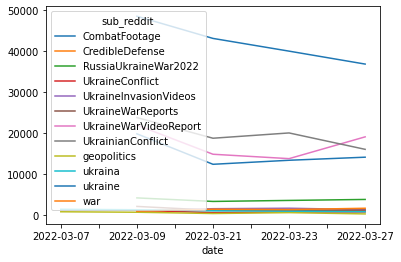

In [196]:
# plot volume per day by subreddit
vol_temp = data[data.date != "comment"] # hopefully not necessary when we have the final data
volume_sr = vol_temp.groupby("sub_reddit")["date"].value_counts()
volume_sr = volume_sr.unstack(level=[1]).T
outfile = os.path.join(outpath, "sr_volume.png")
volume_sr.plot().figure.savefig(outfile)

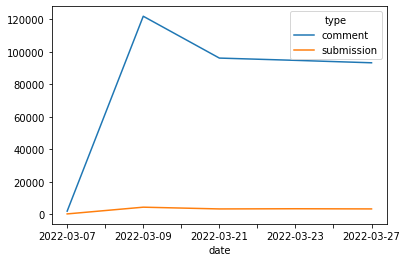

In [195]:
# plot volume per day by type
volume_t = vol_temp.groupby("type")["date"].value_counts()
volume_t = volume_t.unstack(level=[1]).T
outfile = os.path.join(outpath, "type_volume.png")
volume_t.plot().figure.savefig(outfile)


#### Subreddits

In [ ]:
# plot number of entries per subreddit
sr_plot = data["sub_reddit"].value_counts().plot.bar()
#data.loc[data["sub_reddit"] == "2022-03-21"]
outfile = os.path.join(outpath, "subreddit_count.png")
sr_plot.figure.savefig(outfile)

In [ ]:
# plot number of posts per language by subreddit
sr_lang = data.groupby("sub_reddit")["language"].value_counts()
print(sr_lang)
sr_lang = sr_lang.unstack(level=[1])
lang_plot = sr_lang.plot.bar()
outfile = os.path.join(outpath, "subreddit_language.png")
lang_plot.figure.savefig(outfile)


In [257]:
doc_len = temp.groupby("sub_reddit")["doc_length"].describe()

,count,mean,std,min,25%,50%,75%,max
sub_reddit,,,,,,,,
2022-03-09,1.0,13.000000,NaN,13.0,13.0,13.0,13.00,13.0
2022-03-21,3.0,10.333333,5.773503,7.0,7.0,7.0,12.00,17.0
2022-03-23,1.0,21.000000,NaN,21.0,21.0,21.0,21.00,21.0
2022-03-27,3.0,13.666667,7.023769,7.0,10.0,13.0,17.00,21.0
CombatFootage,59668.0,161.526899,234.350826,1.0,45.0,93.0,189.00,8017.0
CredibleDefense,4188.0,352.592884,497.764722,2.0,105.0,209.0,415.25,8475.0
RussiaUkraineWar2022,14754.0,171.245493,261.226957,1.0,39.0,84.0,196.00,8824.0
UkraineConflict,3099.0,164.953211,261.124848,1.0,44.0,86.0,187.00,3838.0
UkraineInvasionVideos,5414.0,119.349095,220.167043,1.0,34.0,68.0,134.00,7950.0


#### Language

In [ ]:
# get number of entries per language
print(data["language"].value_counts())
#data["language"].value_counts().plot.bar()

In [ ]:
# get table of language percentages across subreddits
en_ru_uk = sr_lang[["en","ru","uk"]]
x = data["sub_reddit"].value_counts()
df = pd.concat([en_ru_uk, x.rename("total")], axis=1)

# find percentages
en_ru_uk['en_percent'] = df['en'] / df['total'] * 100
en_ru_uk['ru_percent'] = df['ru'] / df['total'] * 100
en_ru_uk['uk_percent'] = df['uk'] / df['total'] * 100

# round decimals
en_ru_uk.round(decimals = 2)